In [1]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
# Importing all necessary libraries.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 25111993

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [4]:
Data_1 = np.genfromtxt ('c:/Users/Imart/Downloads/excavator_text_vectors_53k.csv', delimiter=",")

FileNotFoundError: c:/Users/Imart/Downloads/excavator_text_vectors_53k.csv not found.

In [6]:
Data_1.shape

(53569, 512)

In [4]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=18, random_state=0).fit(Data_1)

In [14]:
Y=kmeans.labels_

z = pd.DataFrame(Y.tolist())

In [9]:
MCAT_Names = pd.read_excel("c:/Users/Imart/Downloads/excavator_products_data.xlsx",sheet_name="vlookup_kfold")
MCAT_key = pd.read_excel("c:/Users/Imart/Downloads/excavtor_11pmcat_key.xlsx",sheet_name="Sheet1")

MCAT_key.head()

MCAT_Names1 = pd.merge(left=MCAT_Names,right=MCAT_key,left_on=["PMCAT"],right_on=["PMCAT"],how="left")

In [10]:
MCAT_Names1.head()

PRIME_MCAT_ID               PMCAT    PRIME_MCAT_NAME  PC_ITEM_ID  \
0         155897  Earthmoving Bucket        Soil Bucket    55096001   
1         113951           Excavator          Excavator   111777822   
2          41181       Wheel Loaders      Wheel Loaders    29788933   
3          68054           Excavator  Crawler Excavator    33600388   
4          32778           Excavator    Mini Excavators    19263569   

          PC_ITEM_NAME                                      Fasttext_test  key  
0          Soil Bucket  soil bucket fine finish rust free strong const...    0  
1            Excavator                                          excavator    1  
2  LHD UG Wheel Loader  lhd ug wheel loader technical characteristics ...    2  
3   Crawler Excavators                                 crawler excavators    1  
4   Compact Excavators  compact excavators depend on customer requirem...    1

In [11]:
Label_mcat = np.array(MCAT_Names1["key"])

In [12]:
PMCAT_List = list(MCAT_key["PMCAT"])
PMCAT_List

['Earthmoving Bucket',
 'Excavator',
 'Wheel Loaders',
 'Motor Grader',
 'Road Roller',
 'Backhoe Loader',
 'Excavator Parts',
 'Skid Steer Loaders',
 'End Loader',
 'Bulldozer',
 'Trencher']

In [15]:
digits_proj = TSNE(random_state=RS).fit_transform(Data_1)


In [56]:
Sample_data1 = digits_proj[0:10,0].tolist()
Sample_data1 = pd.Series(Sample_data1)
Sample_data1

0   -20.043272
1     0.843924
2     4.514275
3     9.372581
4     8.270648
5   -19.491745
6    17.083792
7   -30.921326
8    24.351297
9    14.048458
dtype: float64

In [55]:
Sample_data2 = digits_proj[0:10,1].tolist()
Sample_data2 = pd.Series(Sample_data2)
Sample_data2

0   -10.387577
1   -61.846951
2    28.035549
3   -52.792614
4     3.150992
5    38.546375
6   -17.043217
7   -32.213989
8    24.055000
9    48.008224
dtype: float64

In [61]:
PMCAT_NAMES = MCAT_Names1["PMCAT"][0:10]
type(PMCAT_NAMES)

pandas.core.series.Series

In [67]:
Clutsr_L = Y[0:10].tolist()
Clutsr_L = pd.Series(Clutsr_L)

In [68]:
Data_with_label = pd.DataFrame()
Data_with_label["TSNE_x"] = Sample_data1
Data_with_label["TSNE_y"] = Sample_data2
Data_with_label["Label"] = PMCAT_NAMES
Data_with_label["Cluster"] = Clutsr_L

In [69]:
display(Data_with_label)

TSNE_x     TSNE_y               Label  Cluster
0 -20.043272 -10.387577  Earthmoving Bucket        3
1   0.843924 -61.846951           Excavator       16
2   4.514275  28.035549       Wheel Loaders       17
3   9.372581 -52.792614           Excavator        0
4   8.270648   3.150992           Excavator        3
5 -19.491745  38.546375       Wheel Loaders       13
6  17.083792 -17.043217           Excavator       16
7 -30.921326 -32.213989           Excavator       16
8  24.351297  24.055000        Motor Grader       17
9  14.048458  48.008224         Road Roller        4

In [44]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 18))

    # We create a scatter plot.
    f = plt.figure(figsize=(48, 48))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=100,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(18):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=64)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


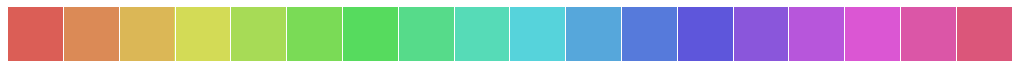

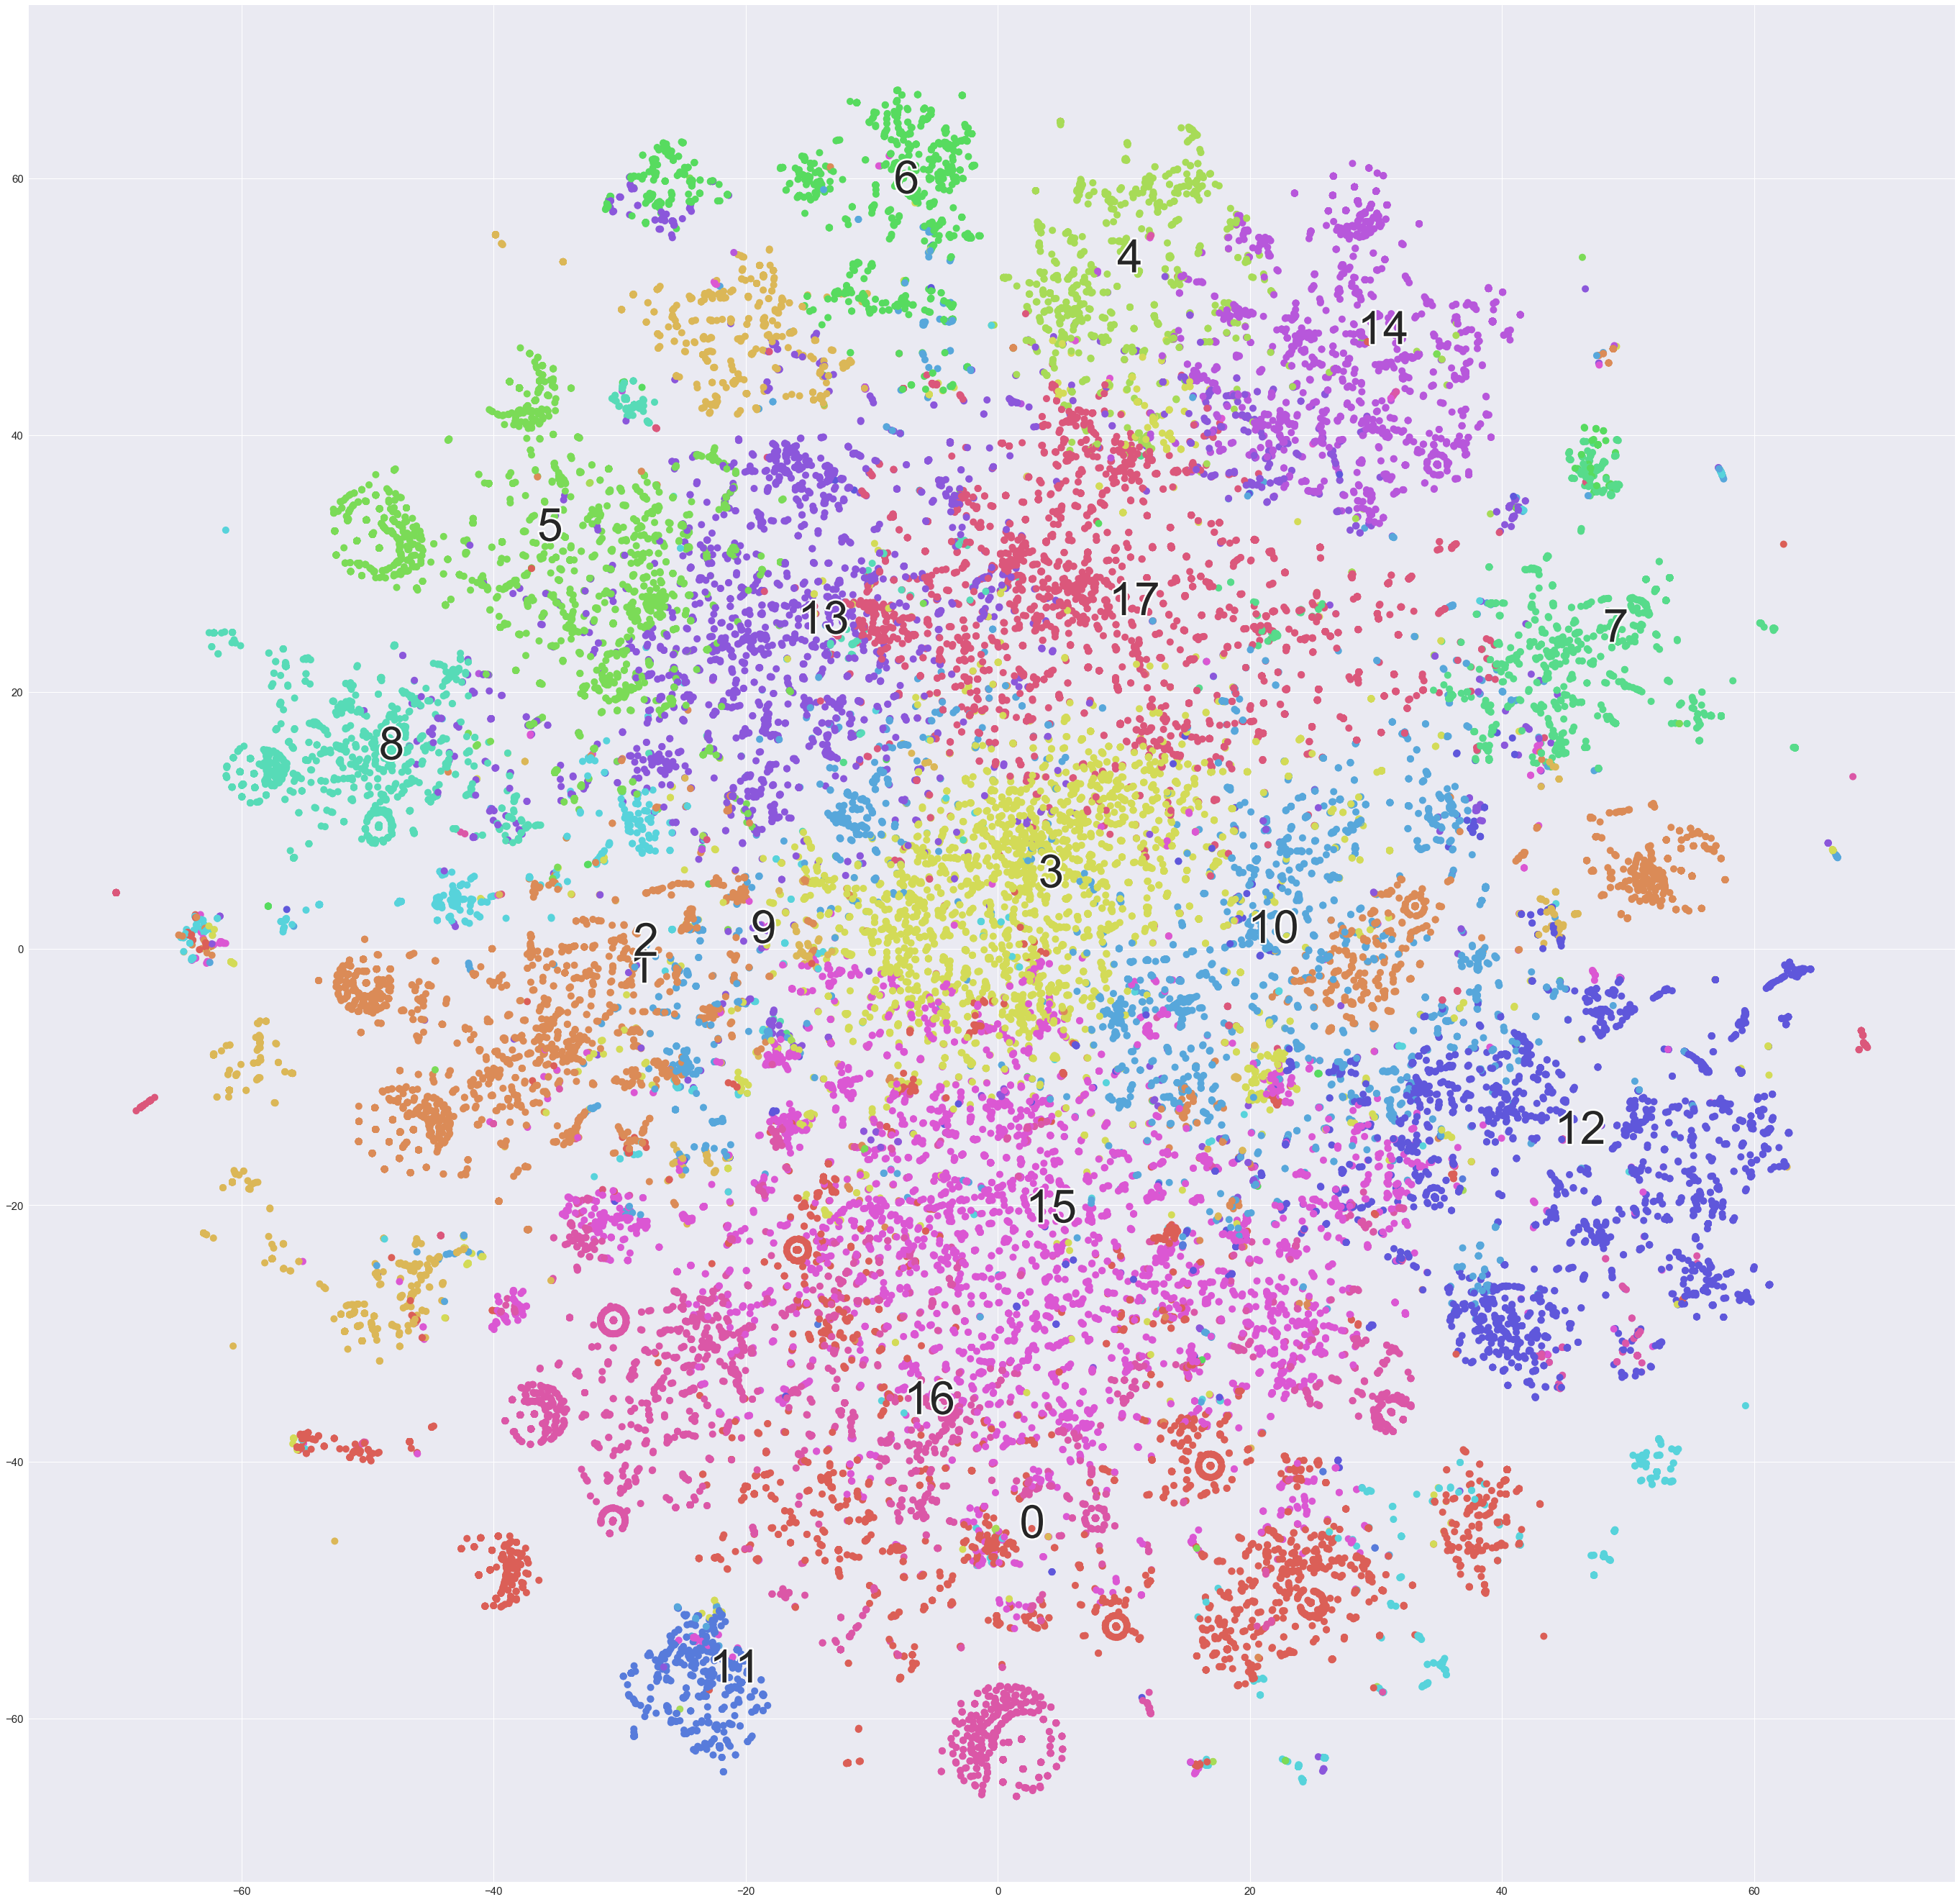

In [35]:
print(list(range(0,18)))
sns.palplot(np.array(sns.color_palette("hls", 18)))
scatter(digits_proj, Y)
plt.savefig('tsne-generated_18_clust_48_100.png', dpi=120)

In [36]:
def scatter_2(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 11))

    # We create a scatter plot.
    f = plt.figure(figsize=(48, 48))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=100,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(11):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(PMCAT_List[i]), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [28]:
len(PMCAT_List)

11

['Earthmoving Bucket', 'Excavator', 'Wheel Loaders', 'Motor Grader', 'Road Roller', 'Backhoe Loader', 'Excavator Parts', 'Skid Steer Loaders', 'End Loader', 'Bulldozer', 'Trencher']


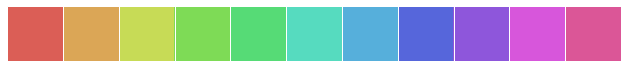

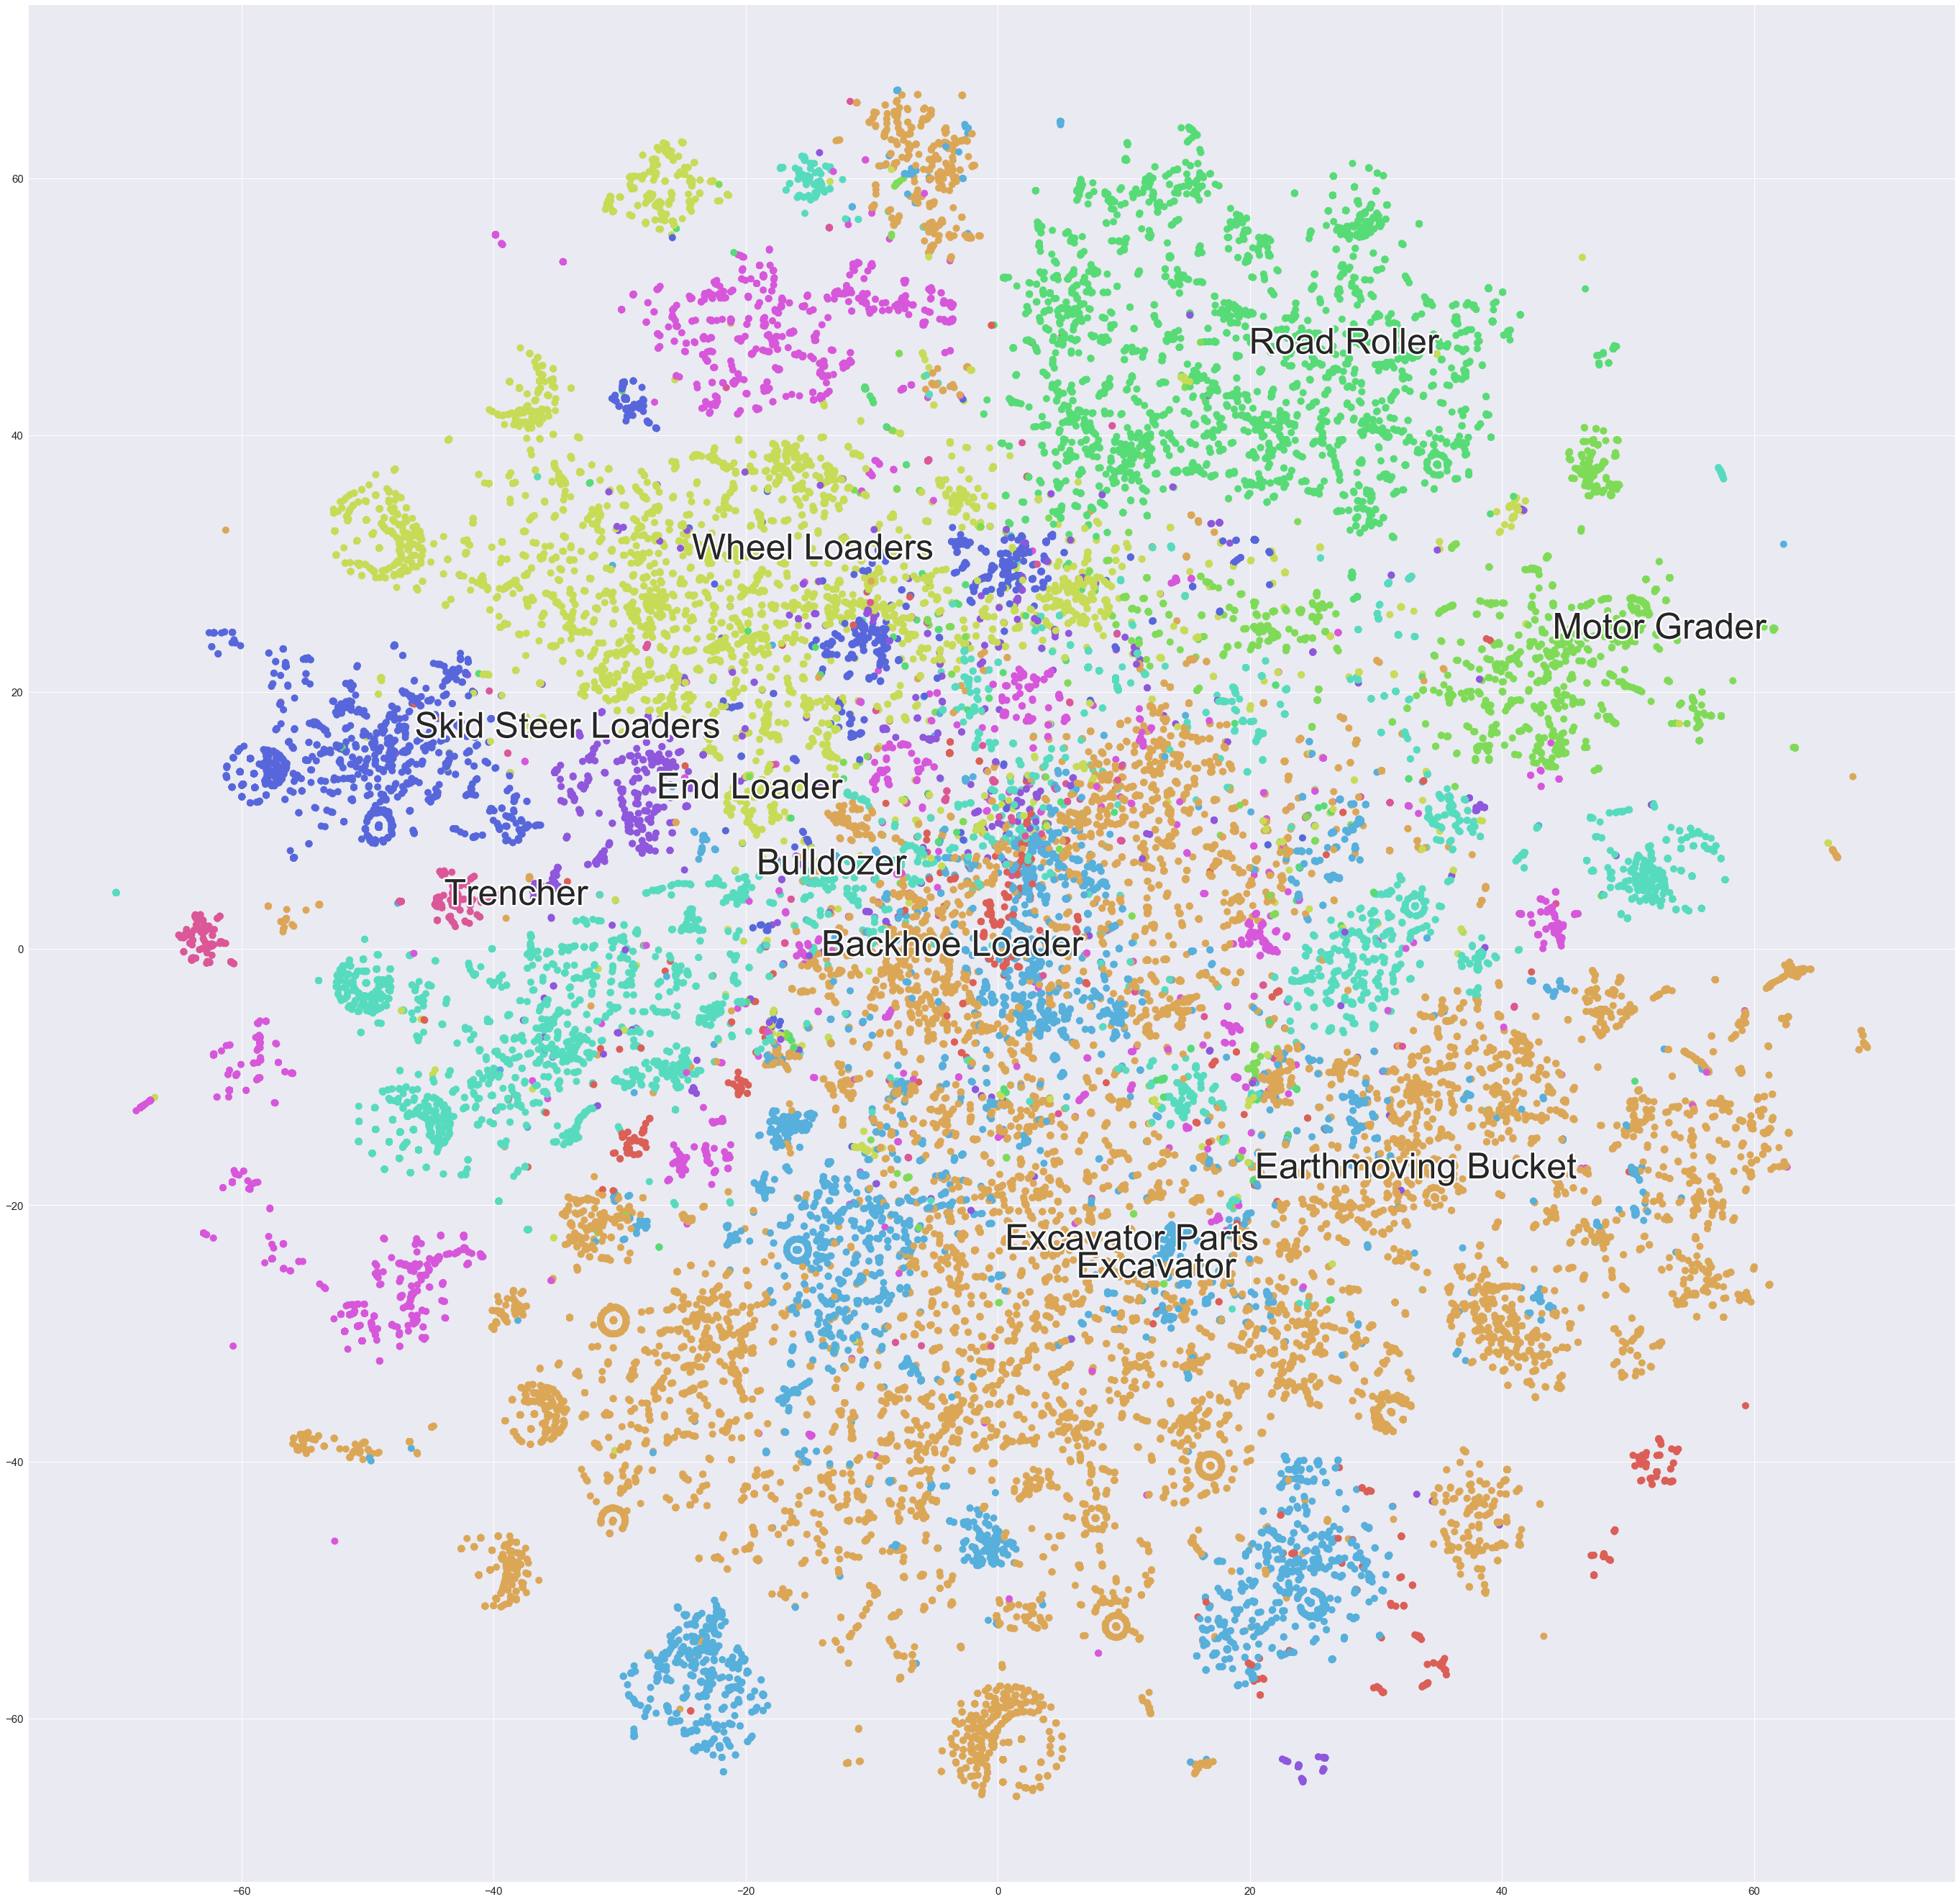

In [37]:
print(PMCAT_List)
sns.palplot(np.array(sns.color_palette("hls", 11)))
scatter_2(digits_proj, Label_mcat)
plt.savefig('tsne-generated_pmcat_cluster_withaxis_48_100.png', dpi=120)